# Feature 늘리기(Polynomial)과 배치 사이즈 조정

##### PolynomialFeatures 이용하여 feature 갯수를 늘리수 있다.
##### 만약, degree=2 이고, X, Y 2개 feature가 있다면 X^2, XY, Y^2 이런식으로 feature 늘림
##### 또한, 선형 모델에서 배치 사이즈 조정에 따른 성능 변화 확인 가능

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [3]:
boston = load_boston()

In [4]:
boston.data[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [5]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [6]:
pd.DataFrame(boston.data, columns=boston.feature_names)[:5]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

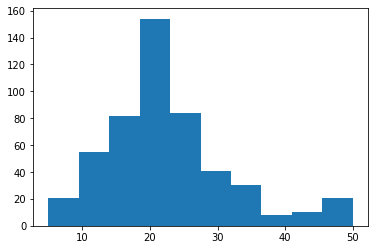

In [7]:
plt.hist(boston.target)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

In [10]:
X_train.shape, X_test.shape

((379, 13), (127, 13))

In [11]:
model = LinearRegression().fit(X_train, y_train)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
train_score, test_score

(0.7697699488741149, 0.6354638433202104)

- 보스톤 집값에 대한 성능이 시험점수가 0.76, 테스트점수가 0.63 나옴.
- 시험점수를 높여야 할것 같다. 다른 모델 Ridge로 실험해 보자

####  Ridge

In [12]:
from sklearn.linear_model import Ridge

In [13]:
model = Ridge().fit(X_train, y_train)

In [14]:
model.coef_.shape

(13,)

In [15]:
# boston 13개 feature에 대한 가중치 값 출력
model.coef_

array([-0.11478591,  0.04541838, -0.03540308,  2.30329133, -8.12744537,
        3.80634143, -0.01428219, -1.33693873,  0.21674809, -0.01175498,
       -0.90393728,  0.00881273, -0.50742473])

In [16]:
train_score = model.score(X_train, y_train)

In [17]:
test_score = model.score(X_test, y_test)

In [18]:
train_score, test_score

(0.7678858330771393, 0.6266182204613853)

- Ridge를 사용해도 별반 성능 향상이 없네
- Ridge에는 "알파"라는 하이퍼파라미터가 있으며 튜닝해 보자

In [19]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
result = {}

for alpha in alpha_list:
    model = Ridge(alpha=alpha).fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    result[alpha] = {'train': train_score, 'test': test_score}
    

In [20]:
result

{0.001: {'train': 0.7697699419717323, 'test': 0.6354518469746901},
 0.01: {'train': 0.7697692698962242, 'test': 0.6353440274419102},
 0.1: {'train': 0.7697119401063663, 'test': 0.6342855934691837},
 1: {'train': 0.7678858330771393, 'test': 0.6266182204613853},
 10: {'train': 0.7623745182677772, 'test': 0.613277304720699},
 100: {'train': 0.7472099719179607, 'test': 0.5927292801276101}}

In [21]:
pd.DataFrame(result).T

,train,test
0.001,0.769770,0.635452
0.010,0.769769,0.635344
0.100,0.769712,0.634286
1.000,0.767886,0.626618
10.000,0.762375,0.613277
100.000,0.747210,0.592729


In [22]:
train_result = pd.DataFrame(result).T

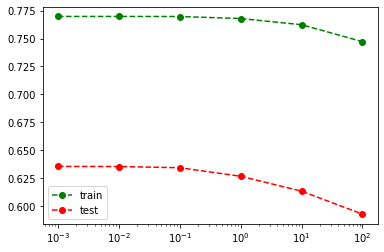

In [23]:
train_result.plot(logx=True, style={'train':'go--','test':'ro--'})

- alpha 파라미터 튜닝도 의미가 없어보이고 성능향상이 보이지 않음
- 모델보다는 데이터 보정을 필요해 보임
- PolynomialFeatures 사용하여 boston 데이터의 feature 늘려 실험해 보자

## PolynomialFeatures

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
Poly = PolynomialFeatures(degree=2)

In [26]:
XX_boston = Poly.fit_transform(boston.data)

In [27]:
boston.data.shape, XX_boston.shape

((506, 13), (506, 105))

- PolynomialFeatures 통해서 13개의 feature가 105개의 feature로 변경됨
- 다시 보정된 데이터를 가지고 Ridge로 실험해 보자

In [28]:
X_train, X_test, y_train, y_test = train_test_split(XX_boston, boston.target, random_state=0)

In [29]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
result = {}

for alpha in alpha_list:
    model = Ridge(alpha=alpha).fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    result[alpha] = {'train': train_score, 'test': test_score}

C:\anaconda\envs\tf2.0\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.90179e-17): result may not be accurate.
  overwrite_a=True).T


In [30]:
result

{0.001: {'train': 0.9520428727203799, 'test': 0.6035302229285656},
 0.01: {'train': 0.9519031920261984, 'test': 0.5773683834858259},
 0.1: {'train': 0.9509109246361201, 'test': 0.5735907584369344},
 1: {'train': 0.9479909766812897, 'test': 0.6072823587339184},
 10: {'train': 0.9415939920928359, 'test': 0.7159777336050812},
 100: {'train': 0.9315498119281059, 'test': 0.7554769845803058}}

In [31]:
pd.DataFrame(result).T

,train,test
0.001,0.952043,0.603530
0.010,0.951903,0.577368
0.100,0.950911,0.573591
1.000,0.947991,0.607282
10.000,0.941594,0.715978
100.000,0.931550,0.755477


In [32]:
train_result = pd.DataFrame(result).T

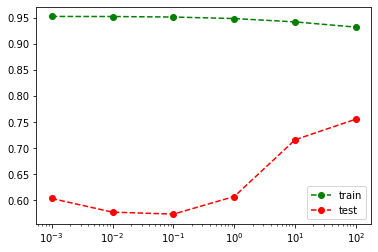

In [33]:
train_result.plot(logx=True, style={'train':'go--','test':'ro--'})

- PolynomialFeatures 통해 feature 늘렸으며 , 해당 데이터로 훈련점수를 0.95까지 올렸다.
- 또한, 시험점수도 0.75까지 올라갔다.

### 데이터 규모에 따른 성능 평가

In [34]:
sample_ratio = np.arange(0.1,1.1,0.1)

In [35]:
sample_ratio

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [36]:
sample_range = len(boston.target) * sample_ratio

In [37]:
sample_range

array([ 50.6, 101.2, 151.8, 202.4, 253. , 303.6, 354.2, 404.8, 455.4,
       506. ])

In [38]:
sample_range = np.around(sample_range).astype('int')

In [39]:
sample_range

array([ 51, 101, 152, 202, 253, 304, 354, 405, 455, 506])

In [40]:
result_score = {}
for batch in sample_range:
    X_batch = XX_boston[:batch]
    y_batch = boston.target[:batch]
    X_train, X_test, y_train, y_test = train_test_split(X_batch, y_batch, random_state=0)
    ridge = Ridge().fit(X_train, y_train)
    train_score = ridge.score(X_train, y_train)
    test_score = ridge.score(X_test, y_test)
    result_score[batch] = {'train':train_score, 'test':test_score}
    

In [41]:
result_score

{51: {'train': 0.9988393807216736, 'test': -0.12654213349716348},
 101: {'train': 0.9941118304316499, 'test': -5.08272050177276},
 152: {'train': 0.9742915781084506, 'test': -0.04954194163827407},
 202: {'train': 0.9811972105521665, 'test': 0.7525967230111957},
 253: {'train': 0.972500615567632, 'test': 0.879943402042299},
 304: {'train': 0.9720120336553364, 'test': 0.8724179613824364},
 354: {'train': 0.9605343402032105, 'test': 0.882253547764},
 405: {'train': 0.9590162159797702, 'test': 0.6651194120409742},
 455: {'train': 0.9414345291065842, 'test': 0.7114382475464582},
 506: {'train': 0.9479909766812897, 'test': 0.6072823587339184}}

In [42]:
result_table = pd.DataFrame(result_score).T

In [43]:
result_table

,train,test
51,0.998839,-0.126542
101,0.994112,-5.082721
152,0.974292,-0.049542
202,0.981197,0.752597
253,0.972501,0.879943
304,0.972012,0.872418
354,0.960534,0.882254
405,0.959016,0.665119
455,0.941435,0.711438
506,0.947991,0.607282


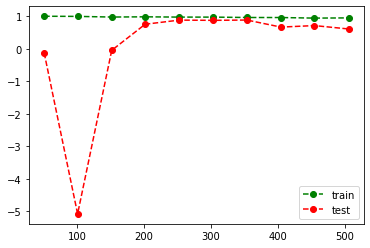

In [44]:
result_table.plot(style={'train':'go--', 'test': 'ro--'})

- 데이터 batch 사이즈를 다르게 해서  Ridge에서 실행해 보니 
- 데이터 batch 사이즈가 300개 정도 되었을대 시험점수가 0.88 까지 나옴.
- 적어도 데이터는 300개 이상은 가지고 있어야 됨.